# Analyse over gebruik van formaties in de Premier League

## Totale gebruik van formaties in de Premier League


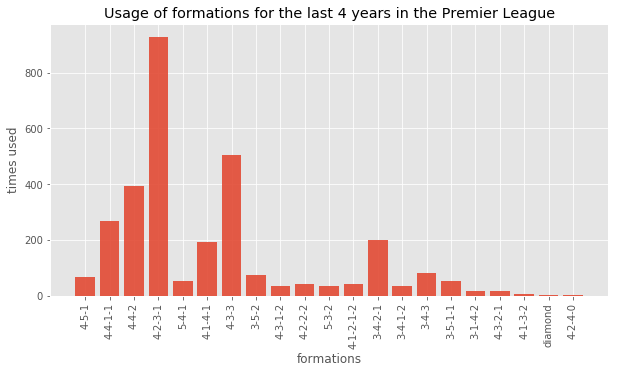

In [26]:
import matplotlib.pyplot as plt
from matplotlib import style
import csv
from pprint import *

# getting the file names
matches_file_name = "Premier_league_matches.csv"
ranking_file_name = "Premier_league_rankings.csv"

matches_list = []
formations_count_dict = {}

# 
with open(matches_file_name, "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    
    for row in csv_reader:
        # append the row into the matches_list
        matches_list.append(row)
        
        # 
        if row[2] in formations_count_dict:
            formations_count_dict[row[2]] += 1
        else:
            formations_count_dict[row[2]] = 1
        
        # 
        if row[4] in formations_count_dict:
            formations_count_dict[row[4]] += 1
        else:
            formations_count_dict[row[4]] = 1

# setting up the bar chart
# 
formations_list = []
count_list = []
for key in formations_count_dict:
    formations_list.append(key)
    count_list.append(formations_count_dict[key])
# 
x_pos = [x for x in range(0, len(formations_list))]

style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,5]

# 
plt.bar(x_pos, count_list, align='center', alpha=0.9)
plt.xticks(x_pos, formations_list, rotation=90)
plt.xlabel('formations')
plt.ylabel('times used')
plt.title('Usage of formations for the last 4 years in the Premier League')

plt.show()


## Verschil in gebruik van formaties tussen hoog en laag gekwalificeerde teams


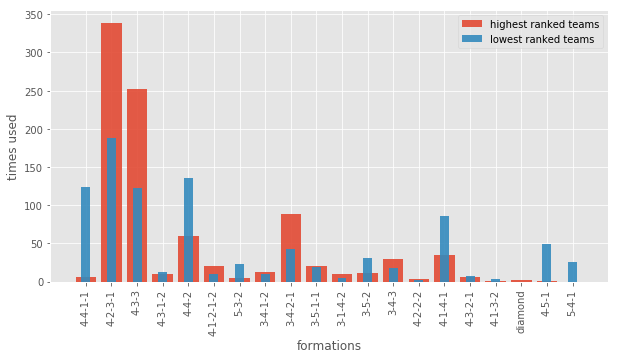

In [81]:
ranking_dict = {}

with open(ranking_file_name, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    for row in csv_reader:
        # 
        if row[3] not in ranking_dict:
            ranking_dict[row[3]] = {}
        # 
        ranking_dict[row[3]][row[1]] = int(row[2])


# 
highest_six_dict = {}
lowest_six_dict = {}


def update_item_count_dict(chosen_dict, formation):
    """"""
    if formation in chosen_dict:
        chosen_dict[formation] += 1
    else:
        chosen_dict[formation] = 1


for match in matches_list:
    if ranking_dict[match[7]][match[1]] in range(1, 7):
        # the home team is in the top 6 this year
        update_item_count_dict(highest_six_dict, match[2])
    elif ranking_dict[match[7]][match[1]] in range(15, 21):
        # the home team is in the lower 6 this year
        update_item_count_dict(lowest_six_dict, match[2])
    
    if ranking_dict[match[7]][match[3]] in range(1, 7):
        # the away team is in the top 6 this year
        update_item_count_dict(highest_six_dict, match[4])
    elif ranking_dict[match[7]][match[3]] in range(15, 21):
        # the away team is in the lower 6 this year
        update_item_count_dict(lowest_six_dict, match[4])


# 
all_formations = []
# 
all_formations.append(list(highest_six_dict.keys()))
all_formations.append(list(lowest_six_dict.keys()))
# flatten the list
all_formations = [item for sublist in all_formations for item in sublist]
# remove duplicates
all_formations = list(dict.fromkeys(all_formations))


formations_info = {}

for formation in all_formations:
    
    if formation not in formations_info:
        formations_info[formation] = {}

    if formation in highest_six_dict:
        formations_info[formation]['highest'] = highest_six_dict[formation]
    else:
        formations_info[formation]['highest'] = 0
    
    if formation in lowest_six_dict:
        formations_info[formation]['lowest'] = lowest_six_dict[formation]
    else:
        formations_info[formation]['lowest'] = 0


# setting up the bar chart
# 
highest_formations_list = []
lowest_formations_list = []

for key in all_formations:
    highest_formations_list.append(formations_info[key]['highest'])
    lowest_formations_list.append(formations_info[key]['lowest'])

# 
x_pos = [x for x in range(0, len(all_formations))]

style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,5]
width = 0.35

# 
plt.bar(x_pos, highest_formations_list, align='center', alpha=0.9, label="highest ranked teams")
plt.bar(x_pos, lowest_formations_list, width, align='center', alpha=0.9, label="lowest ranked teams")
plt.xticks(x_pos, all_formations, rotation=90)
plt.xlabel('formations')
plt.ylabel('times used')
plt.title('Difference in usage of formations by lower and higher ranked teams')

plt.legend()
plt.show()


## Winst en verlies van formaties bij laag gekwalificeerde ploegen
